In [1]:
#The purpose of this project is to demostrate knowledge of EDA and a multiple linear regression model
#The goal is to build a multiple linear regression model and evaluate the model

In [1]:
#Task 1. Imports and loading
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np 

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For confusion matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [3]:
#Task 2  a. Explore data with EDA
df=df0.copy()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.shape

(22699, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
## Check for missing data and duplicates
df.drop_duplicates().shape

(22699, 18)

In [7]:
#total count of missing_value
df.isna().sum().sum()

0

In [8]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [9]:
#There are no duplicates or missing values in the data.

In [10]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [11]:
# there are clearly some outliers in several variables, like tip_amount ($200) and total_amount ($1,200).
#Also, a number of the variables

In [12]:
#Task 2  b. Convert pickup & dropoff columns to datetime
## Convert datetime columns to datetime

# Check the format of the data
df['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [13]:
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)


Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object


In [14]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],format = '%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head()

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [15]:
#Task 2  c. Create duration column

df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df['duration']

0        14.066667
1        26.500000
2         7.200000
3        30.250000
4        16.716667
           ...    
22694     3.266667
22695    40.800000
22696     4.133333
22697    11.933333
22698    13.333333
Name: duration, Length: 22699, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

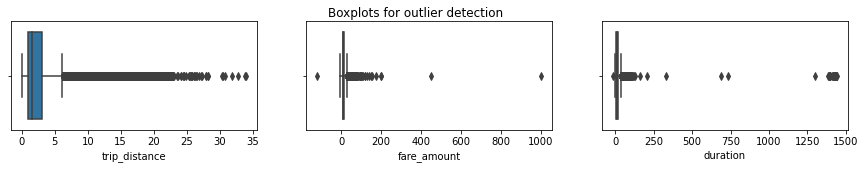

In [17]:
#Task 2  d. Box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();



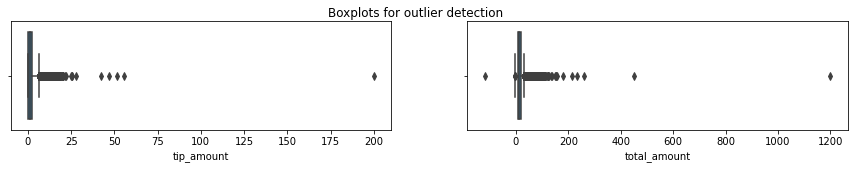

In [18]:
fig,axes = plt.subplots(1,2, figsize=(15,2))
fig.suptitle("Boxplots for outlier detection")
sns.boxplot(ax=axes[0],x=df['tip_amount'])
sns.boxplot(ax=axes[1],x=df['total_amount'])

plt.show()

In [19]:
def removeoutlier(df):
    for i in df.columns:
        print(i)
        if(((df[i].dtype)=="float64") | ((df[i].dtype)=="int64")):
            iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
            lwr=df[i].quantile(0.25)-(6*iqr)
            upr=df[i].quantile(0.75)+(6*iqr)
            df.loc[df[i]<lwr,i]=lwr
            df.loc[df[i]>upr,i]=upr
        else:
            df[i]=df[i]
removeoutlier(df) 

Unnamed: 0
VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
duration


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

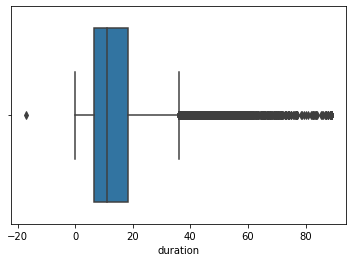

In [20]:
sns.boxplot(df["duration"])

In [21]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.0,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.0,22699.000000,22699.0,2.269900e+04,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.823424,1.0,162.412353,161.527997,1.336887,12.894168,0.328825,0.5,1.818543,0.0,3.000000e-01,16.120095,14.459807
std,3.274493e+07,0.496838,1.285231,3.252029,0.0,66.633373,70.139691,0.496211,10.549633,0.426388,0.0,2.374812,0.0,1.175752e-13,12.914812,11.948480
min,1.212700e+04,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,-41.500000,-1.000000,0.5,0.000000,0.0,3.000000e-01,-45.550000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.0,114.000000,112.000000,1.000000,6.500000,0.000000,0.5,0.000000,0.0,3.000000e-01,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.0,162.000000,162.000000,1.000000,9.500000,0.000000,0.5,1.350000,0.0,3.000000e-01,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.0,233.000000,233.000000,2.000000,14.500000,0.500000,0.5,2.450000,0.0,3.000000e-01,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,15.480000,1.0,265.000000,265.000000,4.000000,62.500000,3.500000,0.5,17.150000,0.0,3.000000e-01,72.100000,88.783333


In [22]:
#Task 3  a. Feature engineering
#Create mean_distance column
df['pickup_dropoff'] = df['PULocationID'].fillna(0).astype(int).astype(str) + ' ' + df['DOLocationID'].fillna(0).astype(int).astype(str)
df['pickup_dropoff'].head()


0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

In [23]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.480000
100 1,15.480000
100 100,0.253333
100 107,1.180000


In [24]:
##  Convert `grouped` to a dictionary

grouped_dict= grouped.to_dict()

# Reassign to only contain the inner dictionary
grouped_dict=grouped_dict['trip_distance']

In [25]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [26]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [27]:
# Create 'day' col
df['day']= df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['day']
# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower


In [28]:
#Create rush_hour column
#Any weekday (not Saturday or Sunday) AND
#Either from 06:00–10:00 or from 16:00–20:00
#Create a binary rush_hour column that contains a 1 if the ride was during rush hour and a 0 if it was not.
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [29]:
def rush_hourizer(hour):
    if 6<= hour['rush_hour']<10:
        val = 1
    elif 16<= hour['rush_hour']<20:
        val=  1
    else:
        val =  0
    return val
    

In [30]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,<bound method StringMethods.lower of <pandas.c...,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,<bound method StringMethods.lower of <pandas.c...,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,<bound method StringMethods.lower of <pandas.c...,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,<bound method StringMethods.lower of <pandas.c...,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,<bound method StringMethods.lower of <pandas.c...,0


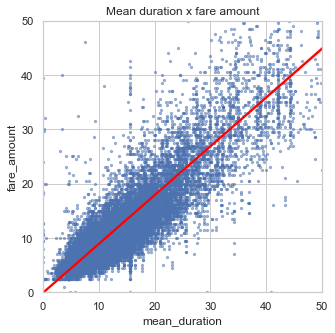

In [31]:
#Task 4. Scatter plot
#Create a scatterplot to visualize the relationship between mean_duration and fare_amount.
sns.set(style='whitegrid')
f=plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'],y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0,50)
plt.xlim(0,50)
plt.title('Mean duration x fare amount')
plt.show()

In [32]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [35]:
#show all column
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,15.48,1,N,236,132,1,52.0,0.0,0.5,14.58,0.0,0.3,72.10,36.800000,236 132,15.480000,40.500000,sunday,<bound method StringMethods.lower of <pandas.c...,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,15.48,1,N,132,163,1,52.0,0.0,0.5,0.00,0.0,0.3,52.80,66.850000,132 163,15.480000,52.941667,saturday,<bound method StringMethods.lower of <pandas.c...,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,1,N,132,132,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80,0.966667,132 132,1.941034,3.021839,saturday,<bound method StringMethods.lower of <pandas.c...,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,15.48,1,N,132,79,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80,29.183333,132 79,15.480000,47.275000,wednesday,<bound method StringMethods.lower of <pandas.c...,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,15.48,1,N,132,234,1,52.0,0.0,0.5,14.64,0.0,0.3,72.10,29.483333,132 234,15.480000,49.833333,sunday,<bound method StringMethods.lower of <pandas.c...,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,15.48,1,N,132,48,2,52.0,3.5,0.5,0.00,0.0,0.3,62.84,39.833333,132 48,15.480000,58.246032,tuesday,<bound method StringMethods.lower of <pandas.c...,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,1,N,228,88,2,52.0,0.0,0.5,0.00,0.0,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,<bound method StringMethods.lower of <pandas.c...,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,15.48,1,N,132,48,2,52.0,0.0,0.5,0.00,0.0,0.3,58.56,45.450000,132 48,15.480000,58.246032,thursday,<bound method StringMethods.lower of <pandas.c...,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,15.48,1,N,186,132,2,52.0,0.0,0.5,0.00,0.0,0.3,58.56,42.850000,186 132,15.480000,42.920000,tuesday,<bound method StringMethods.lower of <pandas.c...,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,15.48,1,N,132,148,1,52.0,0.0,0.5,5.00,0.0,0.3,57.80,71.583333,132 148,15.480000,46.340476,sunday,<bound method StringMethods.lower of <pandas.c...,0


In [36]:
#Task 5. Isolate modeling variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [37]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


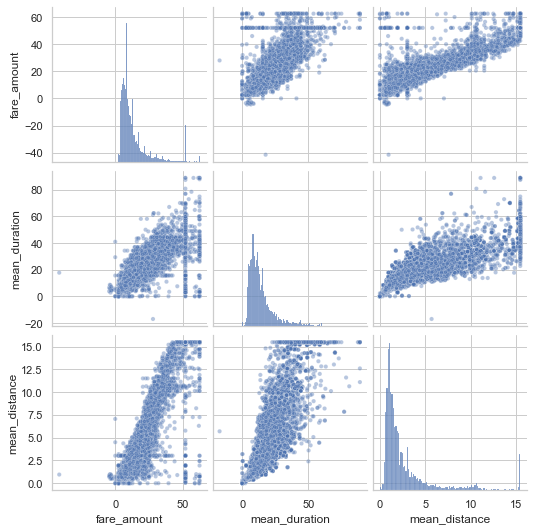

In [39]:
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],plot_kws={'alpha':0.4, 'size':5});

In [40]:
#These variables all show linear correlation with each other. Investigate this further.


In [45]:
#Task 7. Identify correlations
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.000727,0.002933,0.001959,-0.002874
passenger_count,0.266463,1.000000,0.014997,0.014362,0.015886,-0.022035
fare_amount,0.000727,0.014997,1.000000,0.912889,0.858263,-0.019888
mean_distance,0.002933,0.014362,0.912889,1.000000,0.885276,-0.044230
mean_duration,0.001959,0.015886,0.858263,0.885276,1.000000,-0.021531
rush_hour,-0.002874,-0.022035,-0.019888,-0.044230,-0.021531,1.000000


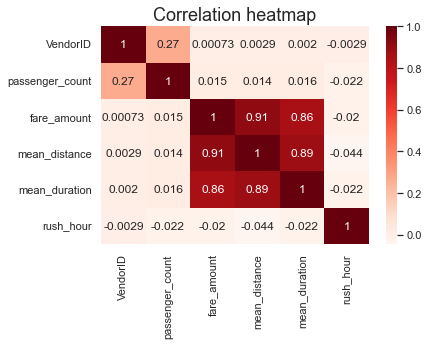

In [46]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

In [47]:
#mean_duration and mean_distance are both highly correlated with the target variable of fare_amount 
#They're also both correlated with each other, with a Pearson correlation of 0.87.

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [50]:
X = df2.drop(columns=['fare_amount'])
y = df2[['fare_amount']]
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [51]:
#Task 8  Pre-process data
X['VendorID'] = X['VendorID'].astype(str)
X['VendorID']

0        2
1        1
2        1
3        2
4        2
        ..
22694    2
22695    2
22696    2
22697    2
22698    1
Name: VendorID, Length: 22699, dtype: object

In [52]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  1.00348588  0.17622221 -0.64893329  0.89286563]
 [-0.50301524 -0.64391805 -0.69805656  1.54099045  0.89286563]
 [ 0.27331093 -0.50735614 -0.57280605 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.47699901 -0.67865644 -0.64893329 -1.11998936]
 [-0.50301524 -0.63196235 -0.8571632   1.54099045 -1.11998936]
 [ 1.82596329  0.9667956   1.13197567 -0.64893329  0.89286563]]


In [55]:
#Fit the model
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8386535310502864
R^2: 0.8386535310502864
MAE: 2.1998563441314802
MSE: 18.056468814198837
RMSE: 4.249290389488443


In [58]:
#Test data

In [59]:
X_test_scaled = scaler.transform(X_test)

In [60]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8723062318203052
R^2: 0.8723062318203052
MAE: 2.1203670535669166
MSE: 13.89357768837296
RMSE: 3.7274089778789983


In [61]:
#The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. 
#In fact, the test scores were even better than the training scores.

#For the test data, an R2 of 0.868 means that 86.8% of the variance in the fare_amount variable is described by the model.

In [68]:
y_pred_test

array([[12.58911988],
       [16.3984488 ],
       [ 6.48943687],
       ...,
       [ 6.94617633],
       [ 6.52016923],
       [10.38717928]])

In [67]:
y_pred_test.ravel()

array([12.58911988, 16.3984488 ,  6.48943687, ...,  6.94617633,
        6.52016923, 10.38717928])

In [65]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
print(results)
results['residual'] = results['actual'] - results['predicted']
results.head()
#when the ravel function use  multi dimention to convert single dimention

       actual  predicted
5818     14.0  12.589120
18134    28.0  16.398449
4655      5.5   6.489437
7378     15.5  16.977336
13914     9.5  10.432898
...       ...        ...
11108    21.5  21.752940
7840      5.5   5.734618
8         9.0   6.946176
16996     7.0   6.520169
19601     8.5  10.387179

[4540 rows x 2 columns]


,actual,predicted,residual
5818,14.0,12.589120,1.410880
18134,28.0,16.398449,11.601551
4655,5.5,6.489437,-0.989437
7378,15.5,16.977336,-1.477336
13914,9.5,10.432898,-0.932898


In [ ]:
#Task 9 Visualize model results

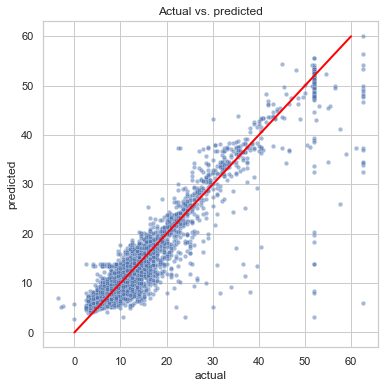

In [69]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

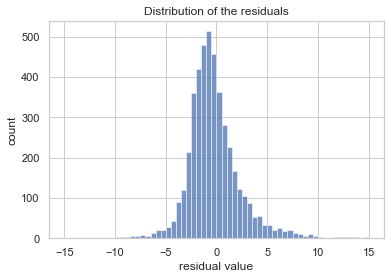

In [70]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [71]:
results['residual'].mean()

-0.03503500422193187

In [72]:
#The distribution of the residuals is approximately normal and has a mean of -0.015.
# The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates
#that the model's errors are evenly distributed and unbiased.

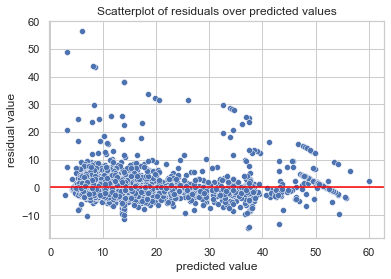

In [73]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [74]:
#Task 9 Coefficients

In [77]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.020449,7.494021,2.409461,0.155437,-0.036886


In [78]:
#The coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction. 

In [79]:
print(X_train['mean_distance'].std())
print(7.133867 / X_train['mean_distance'].std())

3.1889434657099107
2.237062863205035


In [80]:
#for every 3.57 miles traveled, the fare increased by a mean of $7.13. 
#for every 1 mile traveled, the fare increased by a mean of $2.00.

In [81]:
#BONUS CONTENT

In [82]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [85]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8452342693151808
MAE: 2.1839577856415415
MSE: 17.22385390996299
RMSE: 4.150163118476549
